<a href="https://colab.research.google.com/github/SakshiBhaingade/OIBSIP/blob/main/Unemployment_Analysis_with_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset
df = pd.read_csv('Unemployment in India.csv')

#Clean Column Names
df.columns = df.columns.str.strip()

#Drop missing values
df = df.dropna()

#Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

#Rename columns for simplicity
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour Participation Rate'
}, inplace=True)

#View first few rows
print(df.head())


           Region       Date Frequency  Unemployment Rate    Employed  \
0  Andhra Pradesh 2019-05-31   Monthly               3.65  11999139.0   
1  Andhra Pradesh 2019-06-30   Monthly               3.05  11755881.0   
2  Andhra Pradesh 2019-07-31   Monthly               3.75  12086707.0   
3  Andhra Pradesh 2019-08-31   Monthly               3.32  12285693.0   
4  Andhra Pradesh 2019-09-30   Monthly               5.17  12256762.0   

   Labour Participation Rate   Area  
0                      43.24  Rural  
1                      42.05  Rural  
2                      43.50  Rural  
3                      43.97  Rural  
4                      44.68  Rural  


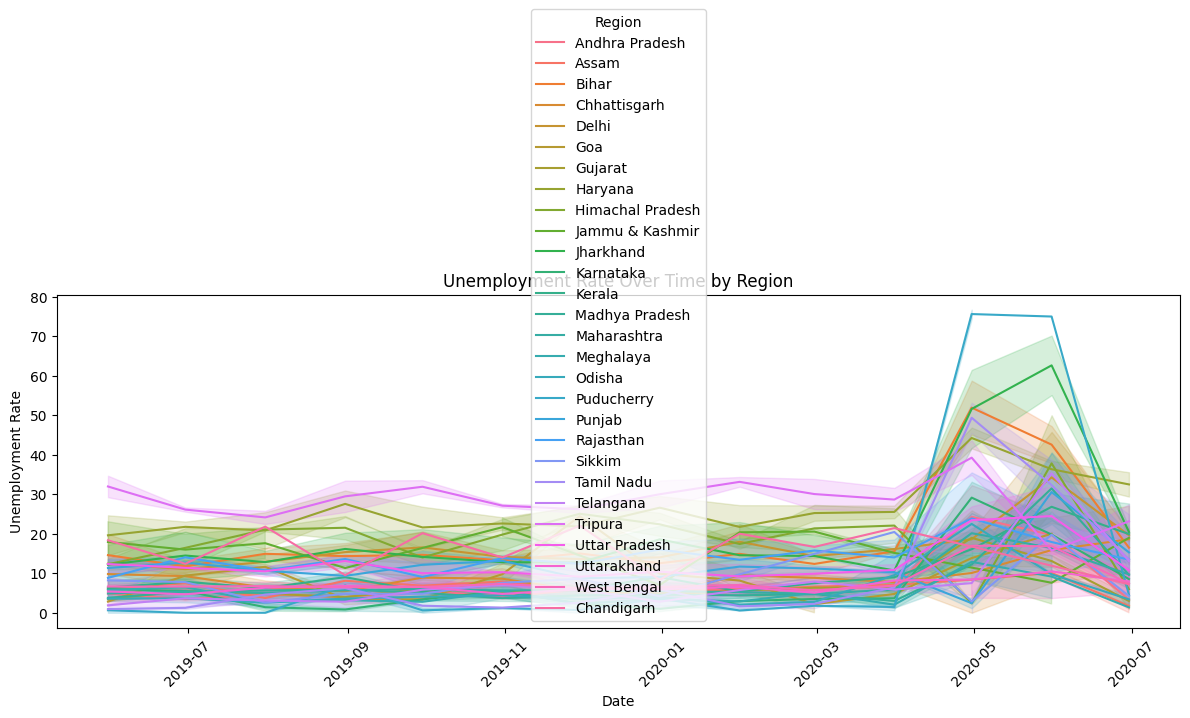

In [ ]:
#Visualize Unemployment Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Unemployment Rate', hue='Region')
plt.title('Unemployment Rate Over Time by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


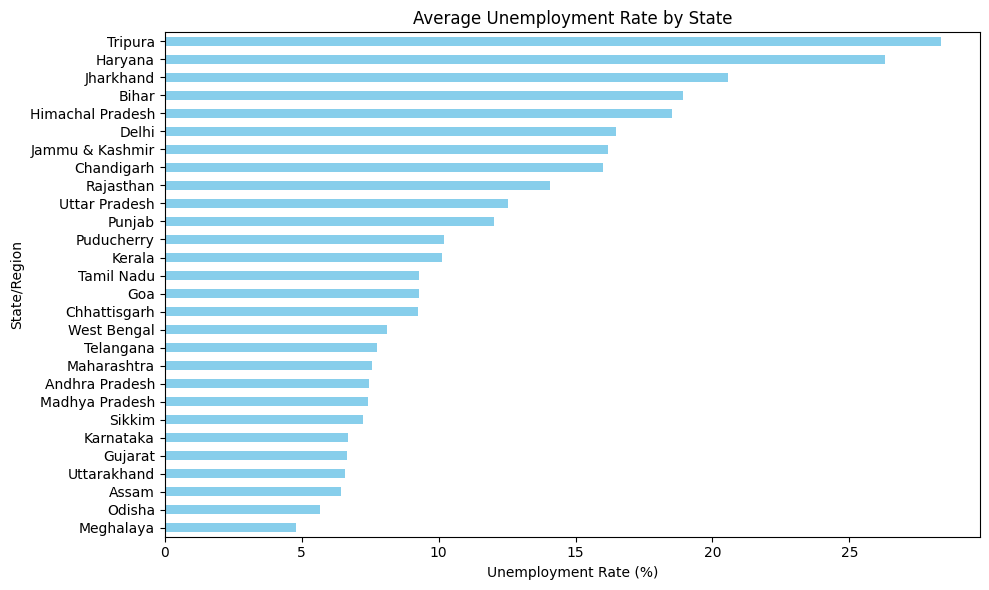

In [ ]:
#Average Unemployment by State
state_avg = df.groupby('Region')['Unemployment Rate'].mean().sort_values()

plt.figure(figsize=(10, 6))
state_avg.plot(kind='barh', color='skyblue')
plt.title('Average Unemployment Rate by State')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('State/Region')
plt.tight_layout()
plt.show()

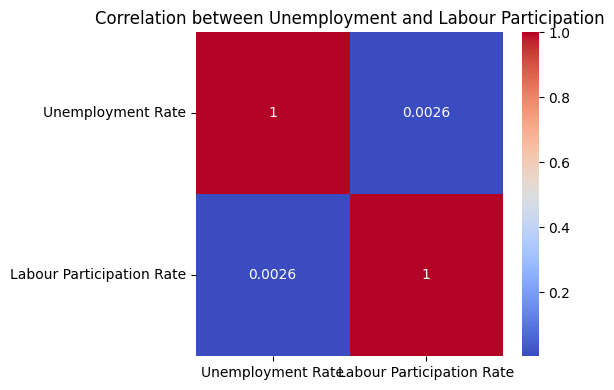

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Unemployment Rate', 'Labour Participation Rate']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Unemployment and Labour Participation')
plt.tight_layout()
plt.show()